In [6]:
%matplotlib inline
import pandas as pd
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings


warnings.filterwarnings('ignore')


def data_formatter(df):
    now_date = datetime.datetime.now().year
    data = df[df['usertype'] == 'Subscriber']
    data['starttime'] = pd.to_datetime(data['starttime'])
    data['user_age'] = now_date - data['birthyear']
    data['tripduration'] = data['tripduration'] / 60
    data['over'] = (data['tripduration'] > 30).astype(int)
    data['time_of_day'] = data['starttime'].apply(lambda x: x.hour)
    return data[['gender', 'user_age', 'tripduration', 'over', 'time_of_day']]

In [4]:
raw_2014 = pd.read_csv('personal/divvy_project/data/Divvy_Trips_2014-Q3-07.csv').dropna(how='any')
raw_2015 = pd.read_csv('personal/divvy_project/data/Divvy_Trips_2015_07.csv').dropna(how='any')
raw_2016_09 = pd.read_csv('personal/divvy_project/data/Divvy_Trips_2015_09.csv').dropna(how='any')

In [5]:
test_data = data_formatter(raw_2014)
train_data = data_formatter(raw_2016_09)

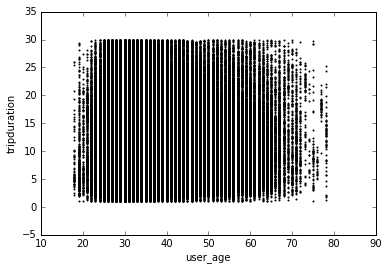

In [11]:
test_data[(test_data['tripduration'] <= 30) & (test_data['user_age'] < 80)].plot(x='user_age', y='tripduration', kind='scatter', s=1)